# **Introduction to Data Science**
# **DS-2001**
# Project


Solution designed by:

Muddassir Asghar - i23-2577

M. Abdullah Ali - i23-2523

Introduction:
Imtiaz Mall, a renowned department store chain, is experiencing declining sales and a significant
number of non-recurring customers in its electronics section. To address this challenge, you, the
newly appointed Senior Data Scientist, have been tasked with conducting a comprehensive
analysis of the electronics section data and developing data-driven strategies for customer
retention and sales growth. This project focuses on the initial steps of this analysis, specifically
exploring the data through various techniques.

Before we begin, necessary libraries are imported

## **Program prerequisites**

In [386]:
# import ur libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## **Module 1: Data Acquisition and Preprocessing:**

### 1. Data Loading:

The data specific to the project requirements is loaded into the program.

In [390]:
df = pd.read_json('electronics.json')
df.head(10)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter,1
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall,1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter,1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall,1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer,1
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,08,1989,Spring,1
6,e67f67b2-12f2-4b0c-b027-19cb052b3dd8,,Female,,"166 Johnny Mount Suite 366\nKimberlyberg, KS 6...",878c7ab1-ec62-4fc5-9061-6bed5db334f6,2021-12-22,8f399675-5c05-4bef-b5d1-863ec387e70a,Clothing,Brand_C,441,41,6,9,Medium,04,1973,Fall,1
7,80a5d367-b3dc-4c18-8a93-584e7c5e7e29,23,Female,High,"203 Tiffany Hill Suite 971\nPort Josetown, VI ...",e88c395b-2e4e-4d97-bbdb-0cc321168753,2022-09-30,f2f4088c-8822-4532-8b4d-ae4ed9ff2e1c,Clothing,Brand_A,390,42,9,2,Low,04,1976,Winter,1
8,,22,Male,Low,"76417 Johnson Flat Suite 425\nCrystalchester, ...",cdae113e-9cb5-4a30-92f9-2c5637044d2a,2023-08-19,06bd8738-5110-49bd-abeb-1abdb3ce7f6b,,Brand_C,297,49,4,5,Low,11,2018,Fall,1
9,a9dc9153-9750-471a-8a90-7c46292fc34c,80,Female,High,Unit 3169 Box 6845\nDPO AA 27380,24577c38-d74b-41a3-a944-2d32510b842b,2020-07-20,ee4c9e6c-801d-425d-ae12-589570ab3a66,Books,Brand_A,84,61,2,7,High,09,,Fall,1


In [391]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month'],
      dtype='object')

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

In [393]:
df = df[df['Product_Category'] == 'Electronics']
df = df.drop(['Product_Category'], axis=1)  
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Brand_A,197,100,9,1,Low,,1995,Winter,1
15,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Brand_B,272,18,10,3,Medium,04,2019,Winter,1
16,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,,241,26,8,5,Hidden,09,1978,Summer,1
17,ffb65cd7-4329-4abb-b076-05eb7cf933e0,68,Female,,"7417 Gregory Garden\nJordanborough, MT 88106",27a18611-855f-4db3-ad4e-77b008695f09,2022-06-25,,Brand_B,115,31,4,4,Low,10,1972,Summer,1
20,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Brand_C,370,13,2,8,High,05,1991,Summer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,ae452c82-be49-4f19-a735-5508e05eb37d,50,Male,Medium,"0587 Roger Village Suite 169\nEast Meganton, D...",320e2200-fd01-4137-9cda-4131bf469c1b,2022-07-17,d7a7e74a-bc19-4b4f-b8c8-60ce07797a4c,Brand_B,39,38,7,10,High,03,2004,Fall,1
990,0a4d6275-f4c9-479d-848e-9ae19eb136fc,38,Other,High,Unit 7320 Box 3586\nDPO AA 76845,d9f9dd67-3826-46ac-aab8-64fb8f7d636d,2020-12-08,002c5e15-47ab-452a-aa2e-b03146bc9462,Brand_B,287,19,6,3,Medium,11,,Spring,1
991,62c73378-cfbf-4896-9243-61de7de9acc7,37,Female,Low,"91116 Bradley Islands\nWest Meghan, PR 35083",adf48b82-b240-4827-b03a-c8d37a8d3e4c,2020-10-05,3ce3fd4f-4a0e-4c99-abbe-a4926ad76e9e,Brand_A,222,,1,10,High,,2011,Summer,0
993,53c5fb01-3ee3-4cad-beab-fcfa3c03bfe3,57,Male,Medium,"7406 Pugh Roads Apt. 254\nBeardfurt, MA 17468",16642cb2-49d1-43ee-a37e-0c59a14bfc50,2022-08-25,41cf36ca-c19d-4fee-b894-68b5afcf186d,Brand_C,127,59,10,8,Low,05,1990,Fall,1


In [394]:
int_columns = [
    "Age",
    "Purchase_Amount",
    "Average_Spending_Per_Purchase",
    "Purchase_Frequency_Per_Month",
    "Brand_Affinity_Score",
    "Month",
    "Year",
]

for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

df = df.replace('', np.nan)

df["Will_Purchase_Next_Month"] = df["Will_Purchase_Next_Month"].astype(bool)

def convert_to_days(date):
    if isinstance(date, str) and date != "Hidden":
        try:
            return datetime.strptime(date, "%Y-%m-%d").toordinal()
        except ValueError:
            return None 
    return None 

# Ensure the "Purchase_Date" column is clean before applying the function
df["Days"] = df["Purchase_Date"].apply(convert_to_days).astype("Int64")
int_columns.append('Days')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 2 to 995
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    346 non-null    object
 1   Age                            343 non-null    Int64 
 2   Gender                         346 non-null    object
 3   Income_Level                   339 non-null    object
 4   Address                        343 non-null    object
 5   Transaction_ID                 344 non-null    object
 6   Purchase_Date                  338 non-null    object
 7   Product_ID                     344 non-null    object
 8   Brand                          336 non-null    object
 9   Purchase_Amount                338 non-null    Int64 
 10  Average_Spending_Per_Purchase  346 non-null    Int64 
 11  Purchase_Frequency_Per_Month   327 non-null    Int64 
 12  Brand_Affinity_Score           328 non-null    Int64 
 13  Product_Ca

In [395]:
df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Days
count,343.0,338.0,346.0,327.0,328.0,329.0,340.0,335.0
mean,49.865889,242.727811,49.069364,5.504587,5.314024,6.884498,1995.347059,738139.629851
std,18.424957,139.811689,27.412381,2.927416,2.836339,3.342087,15.309496,422.653849
min,18.0,10.0,5.0,1.0,1.0,1.0,1970.0,737427.0
25%,34.0,121.25,26.0,3.0,3.0,4.0,1983.0,737766.0
50%,50.0,228.5,45.0,6.0,5.0,7.0,1994.0,738132.0
75%,67.0,358.75,72.75,8.0,8.0,10.0,2010.0,738504.5
max,80.0,496.0,100.0,10.0,10.0,12.0,2023.0,738855.0


In [396]:
df.describe(include="object")

,Customer_ID,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Brand,Product_Category_Preferences,Season
count,346,346,339,343,344,338,344,336,346,344
unique,343,4,4,339,343,292,343,4,4,5
top,Hidden,Other,Medium,Hidden,Hidden,2022-06-07,Hidden,Brand_C,Medium,Winter
freq,4,127,123,5,2,3,2,129,121,90


### 2. Data Cleaning:

o Identify and handle missing values using appropriate techniques like
mean/median imputation or dropping rows/columns with excessive missingness.

In [399]:
df.isnull().sum()

Customer_ID                       9
Age                              12
Gender                            9
Income_Level                     16
Address                          12
Transaction_ID                   11
Purchase_Date                    17
Product_ID                       11
Brand                            19
Purchase_Amount                  17
Average_Spending_Per_Purchase     9
Purchase_Frequency_Per_Month     28
Brand_Affinity_Score             27
Product_Category_Preferences      9
Month                            26
Year                             15
Season                           11
Will_Purchase_Next_Month          0
Days                             20
dtype: int64

In [400]:
df.isnull().any(axis=1).sum()

199

In [401]:
df.head(10)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Brand_A,197,100,9,1,Low,<NA>,1995,Winter,True,738133
15,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Brand_B,272,18,10,3,Medium,4,2019,Winter,True,738674
16,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,NaN,241,26,8,5,Hidden,9,1978,Summer,True,738162
17,ffb65cd7-4329-4abb-b076-05eb7cf933e0,68,Female,NaN,"7417 Gregory Garden\nJordanborough, MT 88106",27a18611-855f-4db3-ad4e-77b008695f09,2022-06-25,NaN,Brand_B,115,31,4,4,Low,10,1972,Summer,True,738331
20,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Brand_C,370,13,2,8,High,5,1991,Summer,True,738121
24,0d187b13-1a29-4421-ae2c-c0c378cc8910,19,Male,Medium,"595 Friedman Tunnel\nLake Jorgetown, NM 14564",58740f61-e34e-4fa6-a72e-a0052e39650d,2022-04-05,20d9b5b4-f26d-4442-ac20-a1d384cd0bc4,Brand_B,485,38,<NA>,5,Low,8,<NA>,Summer,False,738250
28,b3edefd3-68f1-4d4c-a182-28ea8231d858,26,Other,Low,"878 Harry Drives Suite 831\nBaldwinshire, WY 8...",4fd31d6c-ba4d-4fac-84f8-3d4d94f8a155,2020-03-04,b8c2a74e-93eb-4f21-800f-f67367a1bae9,Brand_C,257,41,10,10,Low,6,1980,Summer,True,737488
30,9649b4e5-3d50-4863-bbe2-c3c4d9355d6d,79,Female,High,"387 Simpson River Suite 295\nEast Michaelstad,...",7fe28782-64a3-4f6e-9a0e-b86475279ab9,2023-05-19,61e7872d-7e07-4695-9eb2-468827b50988,Brand_C,423,71,9,8,High,11,2017,Summer,True,738659
32,5d1235b6-5649-413b-a5ff-5e40eef5cd7e,67,Male,High,"07678 Hicks Lodge\nJillfort, NE 98456",Hidden,2021-06-24,39d8b7a6-412d-47af-8270-8af963238914,Brand_A,331,9,9,2,High,4,1985,Summer,True,737965
33,e1b8b270-b93e-419c-a11e-0142fe28352f,20,Other,Medium,Unit 8459 Box 2717\nDPO AE 81307,8618ea6a-45b9-4566-8b80-97ac1a6e6ffd,2020-10-07,f69fb90d-252a-4b87-b248-2392186b7461,Brand_A,111,94,8,10,Low,4,1986,Winter,True,737705


In [402]:
def int_cols_plot(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(16, 6))
        
        # Plot 1: Histogram with KDE
        plt.subplot(1, 3, 1)
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue', alpha=0.6)
        plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df[column].mean():.2f}")
        plt.axvline(df[column].median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {df[column].median():.2f}")
        plt.title(f"Distribution of {column}")
        plt.legend()
        
        # Plot 2: Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], color='orange')
        plt.title(f"Boxplot of {column}")
        
        plt.tight_layout()
        plt.show()

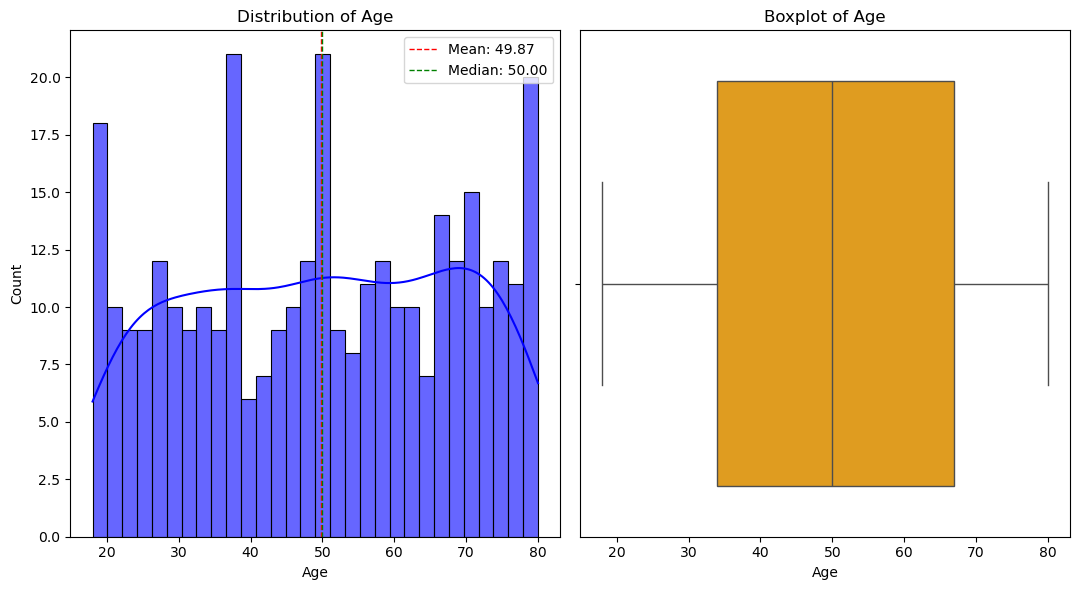

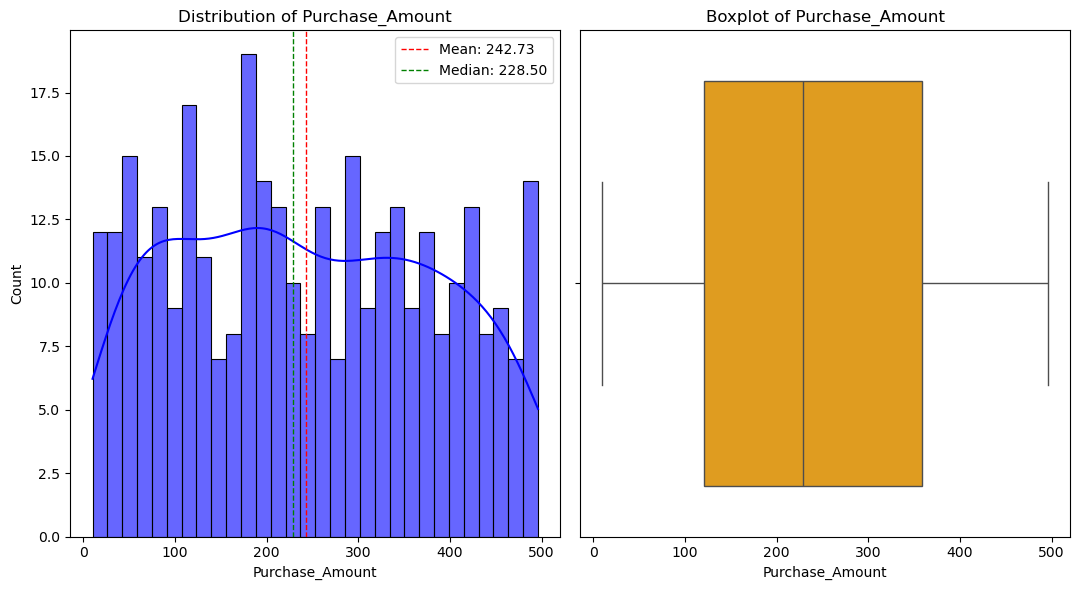

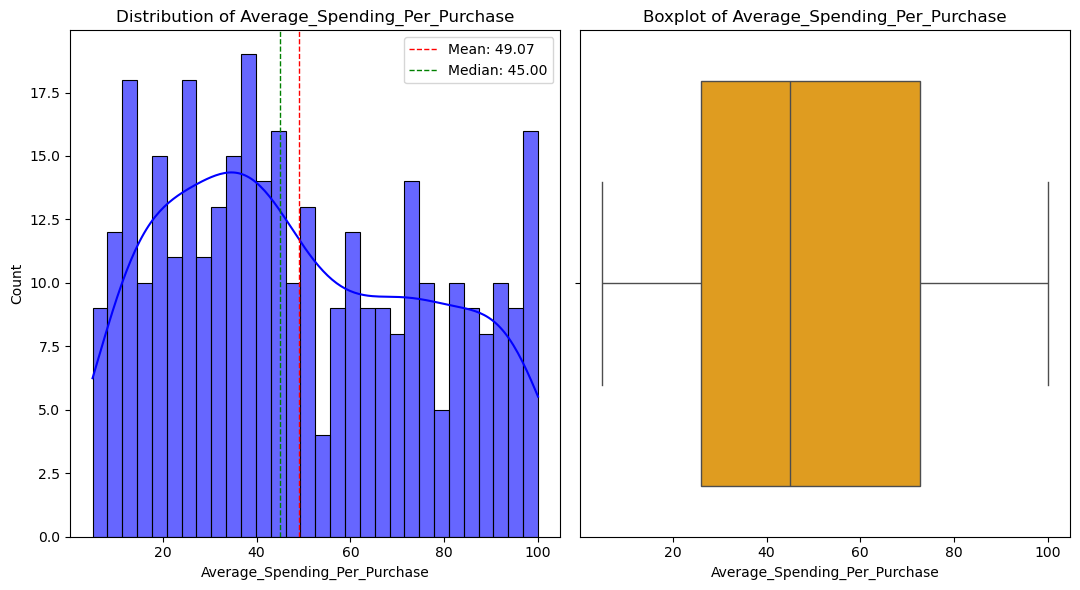

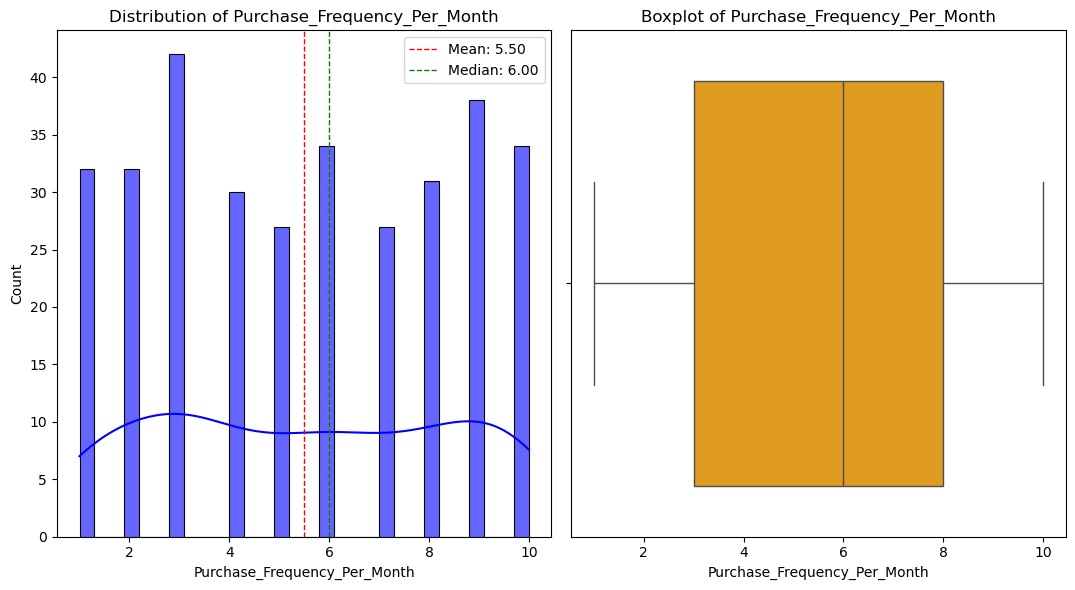

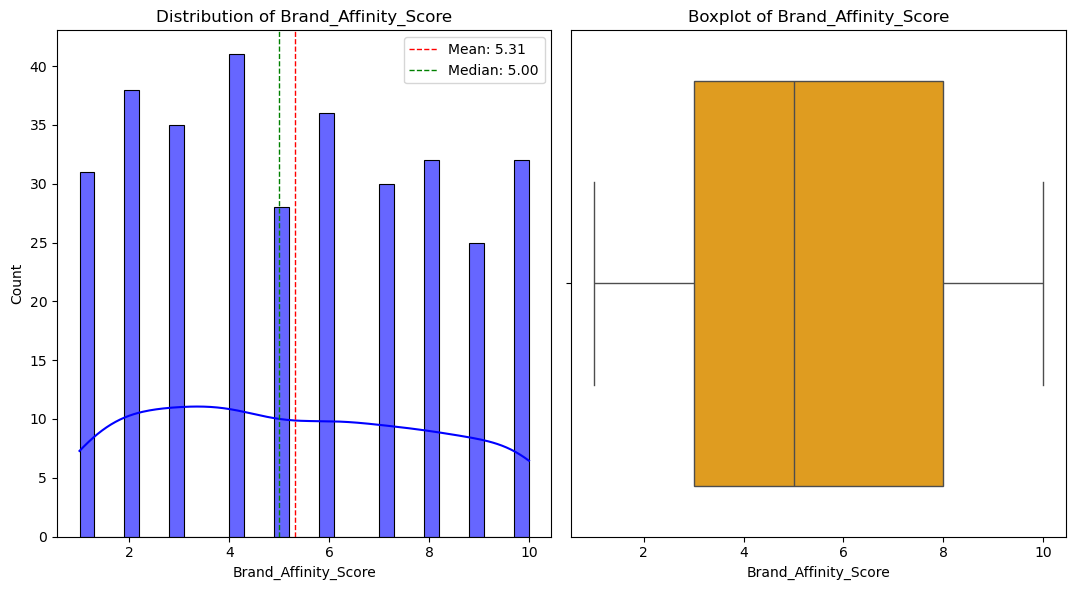

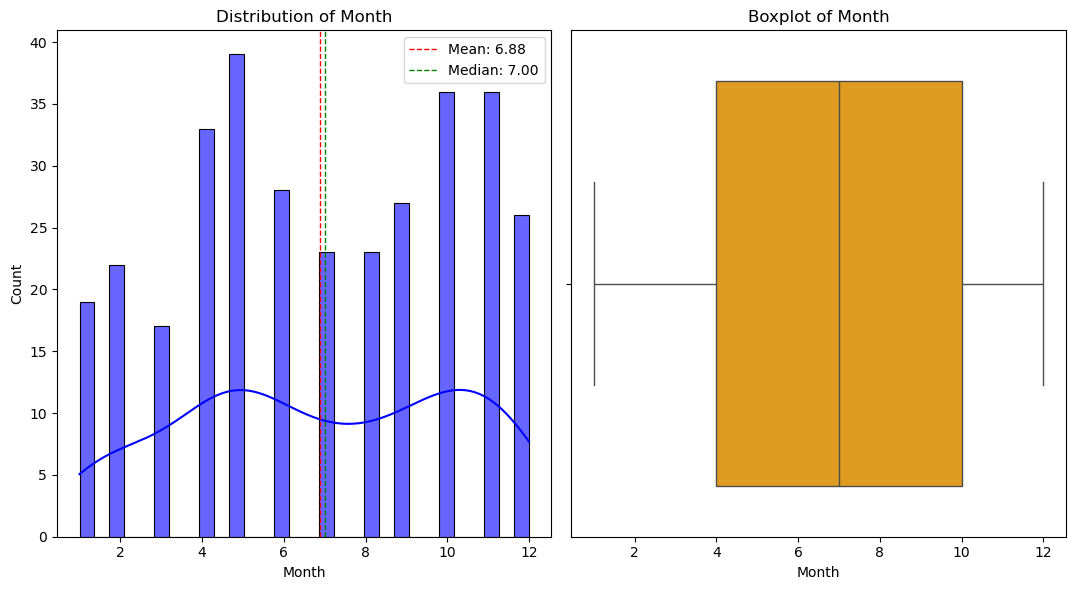

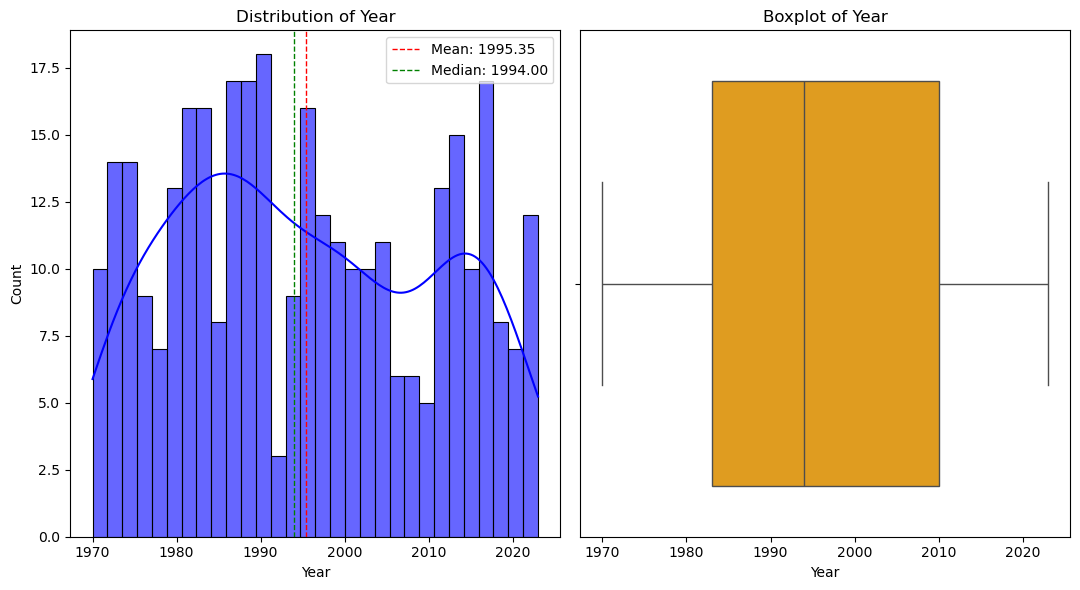

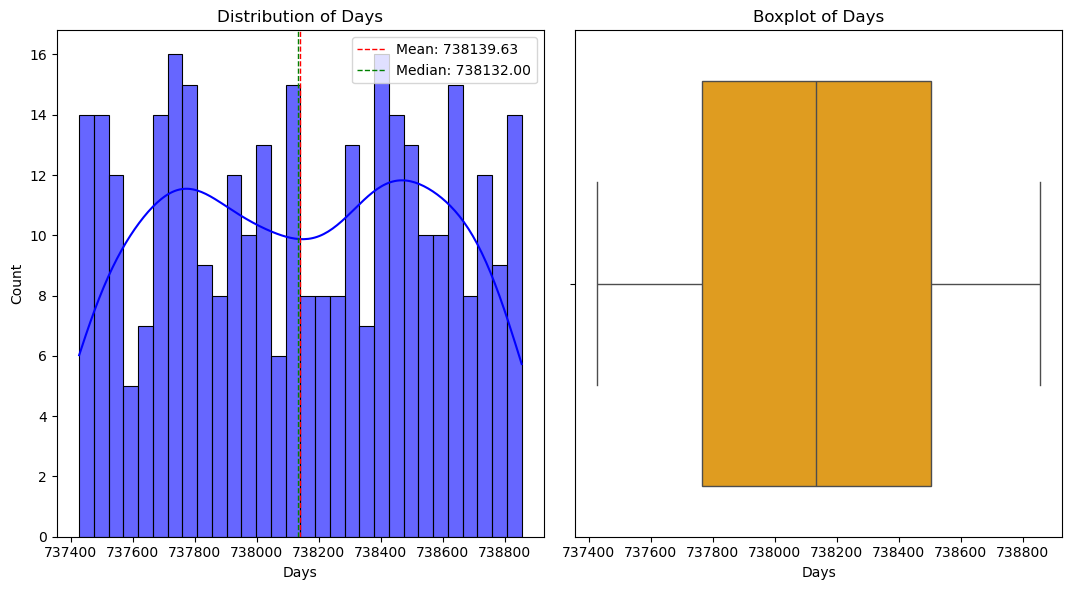

In [403]:
int_cols_plot(df, int_columns)

In [404]:
# # Removing NaN values from Integer columns
mean_impute_columns = [
    "Age", "Purchase_Frequency_Per_Month", "Brand_Affinity_Score", "Days"
]

median_impute_columns = [
    "Purchase_Amount", "Average_Spending_Per_Purchase"
]

log_transform_columns = [
    "Average_Spending_Per_Purchase"
]

for col in mean_impute_columns:
    mean = int(df[col].mean())
    df[col] = df[col].fillna(mean)

for col in median_impute_columns:
    median = int(df[col].median())
    df[col] = df[col].fillna(median)

In [405]:
# Handling missing values in Categorical columns by replacing NaN values by "Hidden"
categorical_columns = ['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences']

for col in categorical_columns:
    df[col] = df[col].fillna("Hidden")

def fill_purchase_date(row):
    if pd.isna(row["Purchase_Date"]) or row["Purchase_Date"] == "Hidden":
        return datetime.fromordinal(int(row["Days"])).strftime("%Y-%m-%d")
    return row["Purchase_Date"]  # Keep original value if valid

# Apply the function to fill missing values
df["Purchase_Date"] = df.apply(fill_purchase_date, axis=1)

In [406]:
columns_to_drop = ['Customer_ID', 'Address', 'Transaction_ID', 'Product_ID']
df.drop(columns=columns_to_drop, inplace=True)

# Purchase_Date_Column = df.drop(['Purchase_Date'], axis=1)
# df = df.drop(['Purchase_Date'], axis=1)

In [407]:
# Removing NaN values in 'Season' column
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}

df['Season'] = np.where(
    df['Season'].isna(),
    np.where(
        df['Month'].isna(),
        'Hidden', 
        df['Month'].map(month_to_season)
    ),
    df['Season']
)


# Removing NaN values in 'Month' column
season_to_month = {
    'Winter': 1, # January
    'Spring': 4, # April
    'Summer': 7, # July
    'Fall': 10   # October
} # These are the "median" month of the seasons 

df['Month'] = np.where(
    df['Month'].isna(),
    df['Season'].map(season_to_month),
    df['Month']
)
df['Month'] = df['Month'].astype(int)

# Handling NaN values in 'Year' column by replacing them with mode
year_mode = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(year_mode)

df.isnull().sum()

Age                              0
Gender                           0
Income_Level                     0
Purchase_Date                    0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
Will_Purchase_Next_Month         0
Days                             0
dtype: int64

In [408]:
df.head(10)

,Age,Gender,Income_Level,Purchase_Date,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
2,57,Other,Low,2021-12-09,Brand_A,197,100,9,1,Low,1,1995,Winter,True,738133
15,54,Male,High,2023-06-03,Brand_B,272,18,10,3,Medium,4,2019,Winter,True,738674
16,22,Male,High,2022-01-07,Hidden,241,26,8,5,Hidden,9,1978,Summer,True,738162
17,68,Female,Hidden,2022-06-25,Brand_B,115,31,4,4,Low,10,1972,Summer,True,738331
20,73,Female,High,2021-11-27,Brand_C,370,13,2,8,High,5,1991,Summer,True,738121
24,19,Male,Medium,2022-04-05,Brand_B,485,38,5,5,Low,8,1990,Summer,False,738250
28,26,Other,Low,2020-03-04,Brand_C,257,41,10,10,Low,6,1980,Summer,True,737488
30,79,Female,High,2023-05-19,Brand_C,423,71,9,8,High,11,2017,Summer,True,738659
32,67,Male,High,2021-06-24,Brand_A,331,9,9,2,High,4,1985,Summer,True,737965
33,20,Other,Medium,2020-10-07,Brand_A,111,94,8,10,Low,4,1986,Winter,True,737705


In [409]:
df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Days
count,355.0,355.0,355.0,355.0,355.0,355.000000,355.0,355.0
mean,49.83662,242.022535,48.966197,5.464789,5.290141,6.800000,1995.121127,738139.594366
std,18.110655,136.449674,27.069256,2.812558,2.727303,3.340726,15.020306,410.540926
min,18.0,10.0,5.0,1.0,1.0,1.000000,1970.0,737427.0
25%,35.0,124.5,26.5,3.0,3.0,4.000000,1983.0,737777.0
50%,50.0,228.0,45.0,5.0,5.0,7.000000,1993.0,738139.0
75%,66.0,354.5,72.0,8.0,7.5,10.000000,2008.0,738481.5
max,80.0,496.0,100.0,10.0,10.0,12.000000,2023.0,738855.0


o Analyze outliers and determine whether to retain or remove them based on their
impact on the analysis.

In [411]:
def remove_outliers(df, columns):
    outliers = {}
    for column in columns:

        if df[column].dtype in ['object', 'bool']:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

c = df.columns
df = remove_outliers(df, c[:-1])
df

,Age,Gender,Income_Level,Purchase_Date,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
2,57,Other,Low,2021-12-09,Brand_A,197,100,9,1,Low,1,1995,Winter,True,738133
15,54,Male,High,2023-06-03,Brand_B,272,18,10,3,Medium,4,2019,Winter,True,738674
16,22,Male,High,2022-01-07,Hidden,241,26,8,5,Hidden,9,1978,Summer,True,738162
17,68,Female,Hidden,2022-06-25,Brand_B,115,31,4,4,Low,10,1972,Summer,True,738331
20,73,Female,High,2021-11-27,Brand_C,370,13,2,8,High,5,1991,Summer,True,738121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,50,Male,Medium,2022-07-17,Brand_B,39,38,7,10,High,3,2004,Fall,True,738353
990,38,Other,High,2020-12-08,Brand_B,287,19,6,3,Medium,11,1990,Spring,True,737767
991,37,Female,Low,2020-10-05,Brand_A,222,45,1,10,High,7,2011,Summer,False,737703
993,57,Male,Medium,2022-08-25,Brand_C,127,59,10,8,Low,5,1990,Fall,True,738392


o Address inconsistencies in data format and encoding.

In [467]:
categorical_columns = ['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences', 'Season']
for col in categorical_columns:
    print(df[col].unique())

['Other' 'Male' 'Female' 'Hidden']
['Low' 'High' 'Hidden' 'Medium']
['Brand_A' 'Brand_B' 'Hidden' 'Brand_C']
['Low' 'Medium' 'Hidden' 'High']
['Winter' 'Summer' 'Fall' 'Spring' 'Hidden']


In [414]:
# # Encoding Non-Numerical data by mapping them via a dictionary
# genders = df['Gender'].unique()
# gender_map = {gender: idx for idx, gender in enumerate(genders)}
# df['Gender'] = df['Gender'].map(gender_map)

# income = df['Income_Level'].unique()
# income_map = {inc: idx for idx, inc in enumerate(income)}
# df['Income_Level'] = df['Income_Level'].map(income_map)

# # prod_cat = df['Product_Category'].unique()
# # prod_cat_map = {prod: idx for idx, prod in enumerate(prod_cat)}
# # df['Product_Category'] = df['Product_Category'].map(prod_cat_map)

# brands = df['Brand'].unique()
# brand_map = {brand: idx for idx, brand in enumerate(brands)}
# df['Brand'] = df['Brand'].map(brand_map)

# prod_cat_pref = df['Product_Category_Preferences'].unique()
# prod_cat_pref_map = {prod_cat_pref: idx for idx, prod_cat_pref in enumerate(prod_cat_pref)}
# df['Product_Category_Preferences'] = df['Product_Category_Preferences'].map(prod_cat_pref_map)

# seasons = df['Season'].unique()
# season_map = {season: idx for idx, season in enumerate(seasons)}
# df['Season'] = df['Season'].map(season_map)

# print(df[['Gender', 'Income_Level', 'Product_Category', 'Brand', 'Product_Category_Preferences', 'Season']])

In [448]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 2 to 995
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  355 non-null    Int64 
 1   Purchase_Date                        355 non-null    object
 2   Purchase_Amount                      355 non-null    Int64 
 3   Average_Spending_Per_Purchase        355 non-null    Int64 
 4   Purchase_Frequency_Per_Month         355 non-null    Int64 
 5   Brand_Affinity_Score                 355 non-null    Int64 
 6   Month                                355 non-null    int32 
 7   Year                                 355 non-null    Int64 
 8   Will_Purchase_Next_Month             355 non-null    bool  
 9   Days                                 355 non-null    Int64 
 10  Gender_Female                        355 non-null    bool  
 11  Gender_Hidden                        355 non-null 

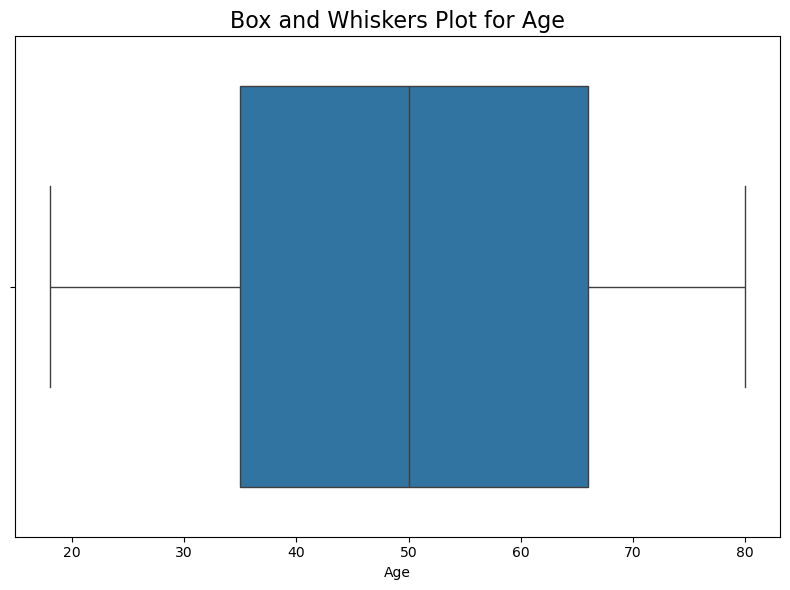

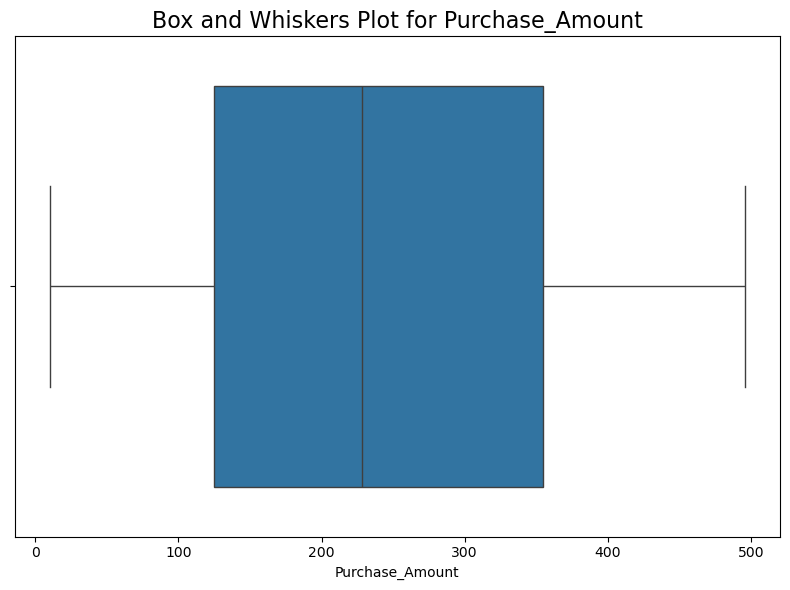

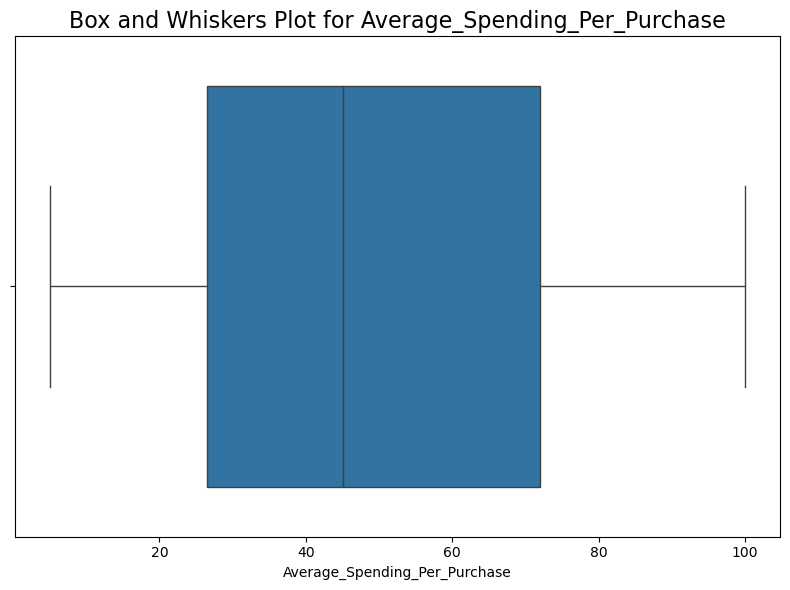

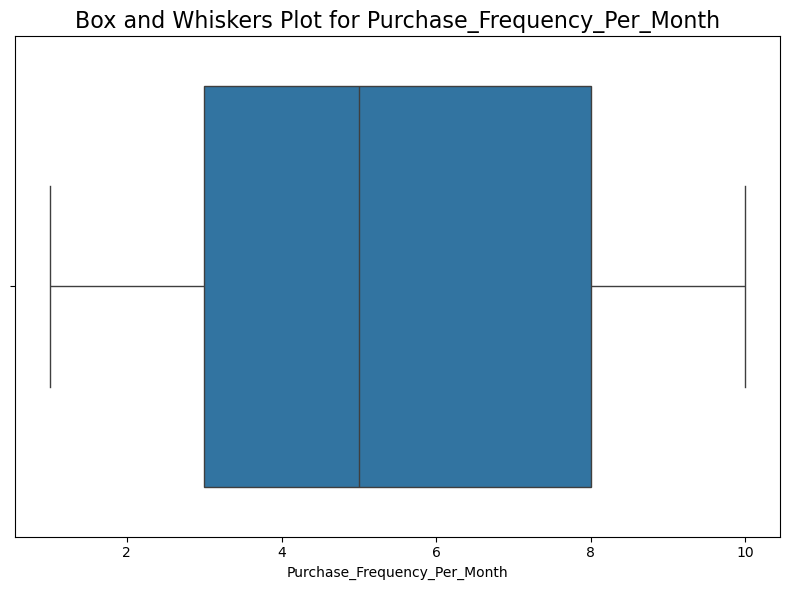

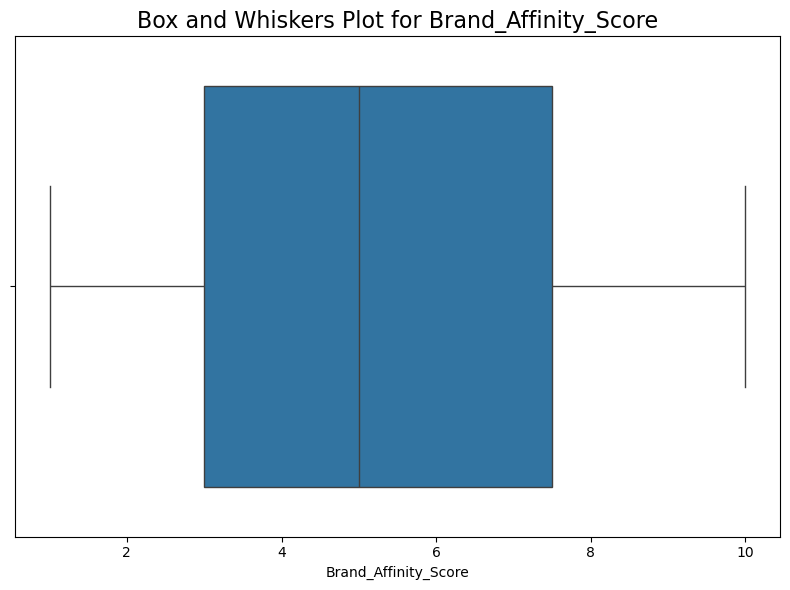

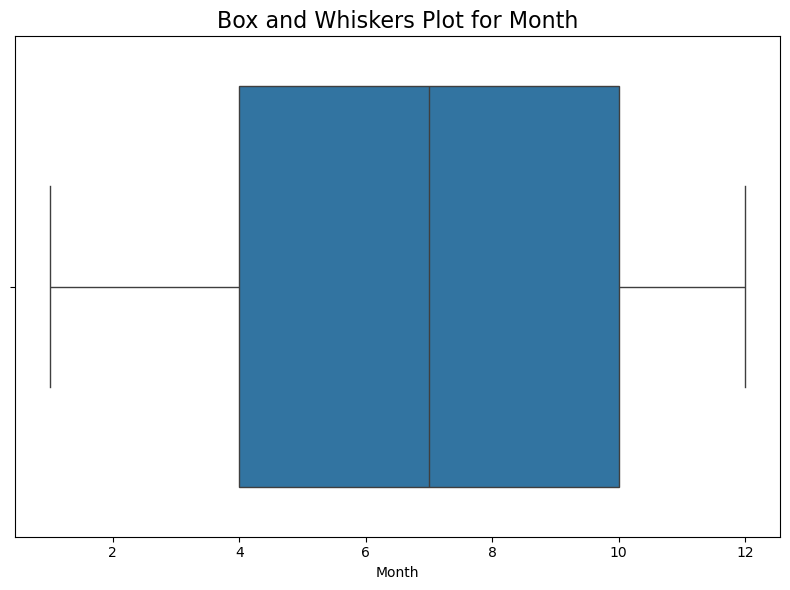

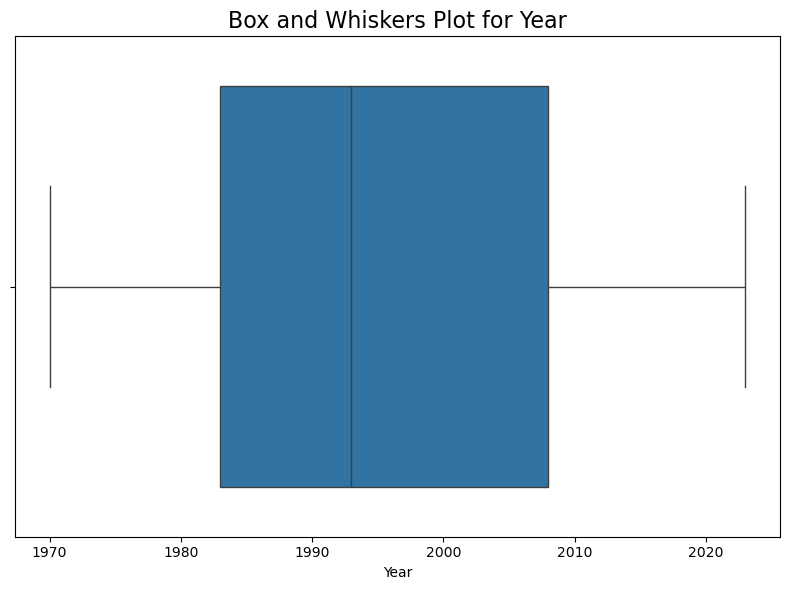

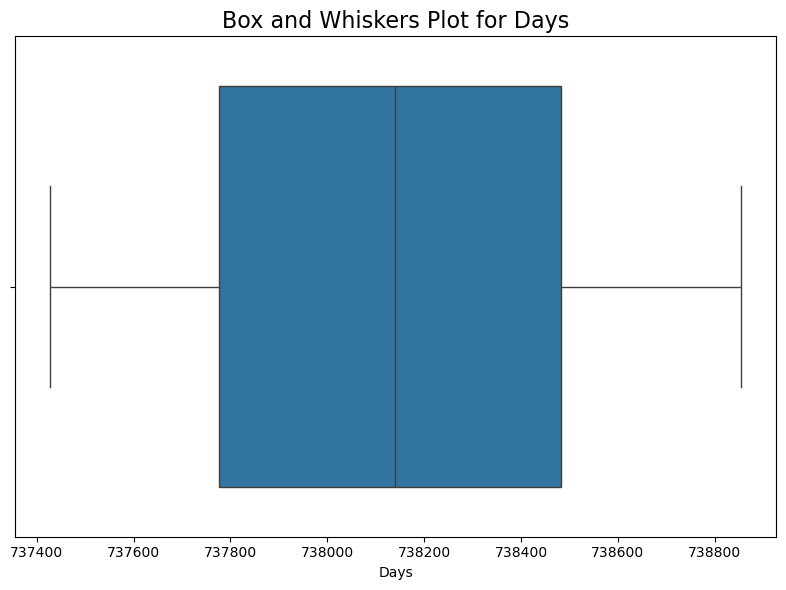

In [450]:
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box and Whiskers Plot for {column}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [451]:
df.head()

,Age,Gender,Income_Level,Purchase_Date,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
2,57,Other,Low,2021-12-09,Brand_A,197,100,9,1,Low,1,1995,Winter,True,738133
15,54,Male,High,2023-06-03,Brand_B,272,18,10,3,Medium,4,2019,Winter,True,738674
16,22,Male,High,2022-01-07,Hidden,241,26,8,5,Hidden,9,1978,Summer,True,738162
17,68,Female,Hidden,2022-06-25,Brand_B,115,31,4,4,Low,10,1972,Summer,True,738331
20,73,Female,High,2021-11-27,Brand_C,370,13,2,8,High,5,1991,Summer,True,738121


### 3. Data Transformation:

o Create new features that provide deeper insights into customer behavior, such
as:

▪ Average spending per purchase

In [459]:
df_encoded

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,...,Brand_Hidden,Product_Category_Preferences_Hidden,Product_Category_Preferences_High,Product_Category_Preferences_Low,Product_Category_Preferences_Medium,Season_Fall,Season_Hidden,Season_Spring,Season_Summer,Season_Winter
2,57,2021-12-09,197,100,9,1,1,1995,True,738133,...,False,False,False,True,False,False,False,False,False,True
15,54,2023-06-03,272,18,10,3,4,2019,True,738674,...,False,False,False,False,True,False,False,False,False,True
16,22,2022-01-07,241,26,8,5,9,1978,True,738162,...,True,True,False,False,False,False,False,False,True,False
17,68,2022-06-25,115,31,4,4,10,1972,True,738331,...,False,False,False,True,False,False,False,False,True,False
20,73,2021-11-27,370,13,2,8,5,1991,True,738121,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,50,2022-07-17,39,38,7,10,3,2004,True,738353,...,False,False,True,False,False,True,False,False,False,False
990,38,2020-12-08,287,19,6,3,11,1990,True,737767,...,False,False,False,False,True,False,False,True,False,False
991,37,2020-10-05,222,45,1,10,7,2011,False,737703,...,False,False,True,False,False,False,False,False,True,False
993,57,2022-08-25,127,59,10,8,5,1990,True,738392,...,False,False,False,True,False,True,False,False,False,False


▪ Purchase frequency per month

▪ Brand affinity score (based on product brand preferences)

▪ Product category preferences (e.g., TVs, smartphones, laptops)

o Standardize or normalize numeric features to ensure they contribute equally to
the given algorithms.

In [461]:
columns_to_standardize = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

Scaled_df = df_encoded.copy()
Scaled_df[columns_to_standardize] = scaler.fit_transform(Scaled_df[columns_to_standardize])

KMeans_df = Scaled_df.copy()
MLRM_df = Scaled_df.copy()

Scaled_df

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,...,Brand_Hidden,Product_Category_Preferences_Hidden,Product_Category_Preferences_High,Product_Category_Preferences_Low,Product_Category_Preferences_Medium,Season_Fall,Season_Hidden,Season_Spring,Season_Summer,Season_Winter
2,0.396092,2021-12-09,-0.330423,1.887966,1.258712,-1.575255,1,-0.008076,True,-0.016085,...,False,False,False,True,False,False,False,False,False,True
15,0.230210,2023-06-03,0.220006,-1.145577,1.614762,-0.840894,4,1.592017,True,1.303548,...,False,False,False,False,True,False,False,False,False,True
16,-1.539199,2022-01-07,-0.007504,-0.849621,0.902662,-0.106534,9,-1.141474,True,0.054653,...,True,True,False,False,False,False,False,False,True,False
17,1.004327,2022-06-25,-0.932225,-0.664649,-0.521538,-0.473714,10,-1.541497,True,0.466886,...,False,False,False,True,False,False,False,False,True,False
20,1.280797,2021-11-27,0.939233,-1.330549,-1.233638,0.995007,5,-0.274758,True,-0.045356,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0.009034,2022-07-17,-1.489993,-0.405688,0.546612,1.729367,3,0.591959,True,0.520549,...,False,False,True,False,False,True,False,False,False,False
990,-0.654495,2020-12-08,0.330092,-1.108582,0.190562,-0.840894,11,-0.341428,True,-0.908850,...,False,False,False,False,True,False,False,True,False,False
991,-0.709789,2020-10-05,-0.146946,-0.146727,-1.589689,1.729367,7,1.058653,False,-1.064962,...,False,False,True,False,False,False,False,False,True,False
993,0.396092,2022-08-25,-0.844157,0.371195,1.614762,0.995007,5,-0.341428,True,0.615680,...,False,False,False,True,False,True,False,False,False,False


## **Module 2: Exploratory Data Analysis (EDA):**

### 1. Univariate Analysis:

o Analyze the distribution of key features like customer age, purchase amount,
and purchase frequency using histograms, boxplots, and descriptive statistics.

o Identify potential skewness or outliers in the data.

### 2. Bivariate Analysis:

o Utilize scatterplots and heatmaps to explore relationships between different
features, such as purchase amount vs. income level, brand affinity vs. product
category, and purchase frequency vs. age.

o Investigate the presence of correlations and identify any impactful
relationships.

### 3. Temporal Analysis:

o Analyse trends in customer behaviour over time, including changes in
purchase frequency, average spending, and product preferences.

o Identify seasonal variations or any significant shifts in customer behavior
patterns.

## **Module 3: Regression and Decision Tree Analysis:**

### **A. Linear Regression Analysis:**

### 1. Problem Definition:

• Predict the average spending per purchase based on customer demographics and
purchase history.

In [465]:
MLRM_df

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,...,Brand_Hidden,Product_Category_Preferences_Hidden,Product_Category_Preferences_High,Product_Category_Preferences_Low,Product_Category_Preferences_Medium,Season_Fall,Season_Hidden,Season_Spring,Season_Summer,Season_Winter
2,0.396092,2021-12-09,-0.330423,1.887966,1.258712,-1.575255,1,-0.008076,True,-0.016085,...,False,False,False,True,False,False,False,False,False,True
15,0.230210,2023-06-03,0.220006,-1.145577,1.614762,-0.840894,4,1.592017,True,1.303548,...,False,False,False,False,True,False,False,False,False,True
16,-1.539199,2022-01-07,-0.007504,-0.849621,0.902662,-0.106534,9,-1.141474,True,0.054653,...,True,True,False,False,False,False,False,False,True,False
17,1.004327,2022-06-25,-0.932225,-0.664649,-0.521538,-0.473714,10,-1.541497,True,0.466886,...,False,False,False,True,False,False,False,False,True,False
20,1.280797,2021-11-27,0.939233,-1.330549,-1.233638,0.995007,5,-0.274758,True,-0.045356,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0.009034,2022-07-17,-1.489993,-0.405688,0.546612,1.729367,3,0.591959,True,0.520549,...,False,False,True,False,False,True,False,False,False,False
990,-0.654495,2020-12-08,0.330092,-1.108582,0.190562,-0.840894,11,-0.341428,True,-0.908850,...,False,False,False,False,True,False,False,True,False,False
991,-0.709789,2020-10-05,-0.146946,-0.146727,-1.589689,1.729367,7,1.058653,False,-1.064962,...,False,False,True,False,False,False,False,False,True,False
993,0.396092,2022-08-25,-0.844157,0.371195,1.614762,0.995007,5,-0.341428,True,0.615680,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
df_encoded

In [497]:
X = MLRM_df[['Age', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Gender_Hidden',
             'Income_Level_High', 'Income_Level_Low', 'Income_Level_Medium', 'Income_Level_Hidden',
             'Purchase_Amount', 'Purchase_Frequency_Per_Month', 
             'Product_Category_Preferences_High', 
             'Product_Category_Preferences_Medium', 'Product_Category_Preferences_Low', 'Product_Category_Preferences_Hidden'
            ]]

y = MLRM_df['Average_Spending_Per_Purchase']

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply feature scaling (StandardScaler normalizes to mean=0 and std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the linear regression model
model = LinearRegression().fit(X_train_scaled, y_train)

# Print model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Mean Absolute Error (to assess model performance)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Model Coefficients: [-0.05470629  0.0426788  -0.04742284 -0.01050081  0.04655165  0.0395884
 -0.04020976 -0.05240873  0.11224854 -0.06101434 -0.05745192]
Model Intercept: -9.202383078504725e-05
R^2 Score: -0.037325830682394034
Mean Absolute Error: 0.7978221258814401


In [499]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.8937087736066668
Mean Absolute Error: 0.7862006690616502
R² Score: -0.01160770803916722


C:\Users\Mudd\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### 2. Model Building:

• Preprocess the data by selecting relevant numerical and categorical variables (e.g.,
income level, product category, age).

• Split the dataset into training and testing sets.

### 3. Implementation:

• Train a linear regression model using the training data.

• Evaluate the model using metrics such as Mean Absolute Error (MAE), Mean
Squared Error (MSE), and R-squared.

### 4. Visualization:

• Plot the predicted vs. actual values for the test dataset.

• Include regression lines for better interpretability.

### **B. Decision Tree Analysis:**

### 1. Problem Definition:

• Classify whether a customer will make a purchase in the next month (use a binary
target variable).

### 2. Model Building:

• Engineer a binary target variable (e.g., 1 = purchase made, 0 = no purchase).

• Use features like purchase frequency, spending history, and product preferences.

### 3. Implementation:

• Train a decision tree classifier and use criteria such as Gini Impurity or
Entropy.

• Evaluate the model using metrics such as Accuracy, Precision, Recall, and F1
Score.

### 4. Visualization:

• Plot the decision tree.

• Highlight important features that influence the decision.

## **Module 4: Clustering Analysis:**

(Hint: Remove the predicted label and then apply K-Means Clustering)

### 1. Define the number of clusters(k):

• Analyze the elbow plot to determine the optimal number of clusters based on the
sum of squared distances within each other.

### 2. Apply K-Means Clustering:

• Implement K-means with the chosen k value to segment customers into distinct
clusters based on their purchase behavior and preferences.

### 3. Analyze cluster characteristics:

• Investigate key features of each cluster, such as average purchase amount, brand
affinity and product category preferences.

• Identify significant differences and similarities between clusters.

## **Module 5: Comparison and Conclusion:**

### 1. Compare the predictive performance of the regression,decision tree and K-Means
Clustering models.

• Discuss strengths, limitations, and real-world applicability in the context of
customer behavior analysis.

### 2. Provide actionable recommendations for the electronics section based on the results.